In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load Data using pandas into dataframe
df = pd.read_csv("train.csv")

In [4]:
#Print First 5 Data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Missing Values in each column of dataframe
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
#Basic Statistics
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
#Removes rows where the SalePrice column has missing (NaN) values
df = df.dropna(subset=['SalePrice'])

In [8]:
#Select only numerical columns (integers and floats)
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
#Fill missing (NaN) values in numerical columns with the mean of each column
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [9]:
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
#Select columns with categorical data (strings or objects)
categorial_columns= df.select_dtypes(include=['object']).columns
#Fill missing (NaN) values in categorical columns with the most frequent value (mode) of each column
df[categorial_columns] = df[categorial_columns].fillna(df[categorial_columns].mode().iloc[0])

In [11]:
categorial_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
#iloc[0] picks the first mode value incase if there are multiple
df[categorial_columns].mode().iloc[0]

MSZoning              RL
Street              Pave
Alley               Grvl
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood       NAmes
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              TA
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         Unf
BsmtFinType2         Unf
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
KitchenQual           TA
Functional           Typ
FireplaceQu           Gd
GarageType        Attchd
GarageFinish         Unf
GarageQual            TA
GarageCond            TA
PavedDrive             Y
PoolQC                Gd
Fence              MnPrv


In [14]:
# Total missing values after cleaning
df.isnull().sum().sum()

np.int64(0)

In [16]:
df = df[['SalePrice','GrLivArea','OverallQual','GarageCars','YearBuilt']]
print('\nStatistics')
df.describe()


Statistics


,SalePrice,GrLivArea,OverallQual,GarageCars,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,6.099315,1.767123,1971.267808
std,79442.502883,525.480383,1.382997,0.747315,30.202904
min,34900.000000,334.000000,1.000000,0.000000,1872.000000
25%,129975.000000,1129.500000,5.000000,1.000000,1954.000000
50%,163000.000000,1464.000000,6.000000,2.000000,1973.000000
75%,214000.000000,1776.750000,7.000000,2.000000,2000.000000
max,755000.000000,5642.000000,10.000000,4.000000,2010.000000


In [17]:
print(df.isnull().sum())

SalePrice      0
GrLivArea      0
OverallQual    0
GarageCars     0
YearBuilt      0
dtype: int64


In [18]:
correlation_matrix = df.corr()
print(correlation_matrix)

             SalePrice  GrLivArea  OverallQual  GarageCars  YearBuilt
SalePrice     1.000000   0.708624     0.790982    0.640409   0.522897
GrLivArea     0.708624   1.000000     0.593007    0.467247   0.199010
OverallQual   0.790982   0.593007     1.000000    0.600671   0.572323
GarageCars    0.640409   0.467247     0.600671    1.000000   0.537850
YearBuilt     0.522897   0.199010     0.572323    0.537850   1.000000


<Figure size 600x400 with 0 Axes>

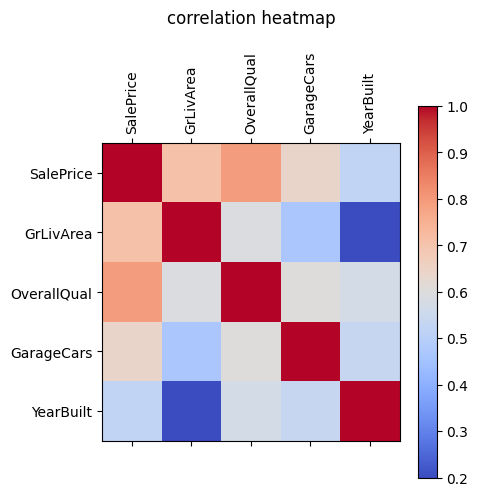

In [20]:
plt.figure(figsize=(6,4))
plt.matshow(correlation_matrix,cmap='coolwarm')
plt.colorbar()
plt.title("correlation heatmap",pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()